<a href="https://colab.research.google.com/github/bileldjobbi/Sentiment_Analysis/blob/RecipeApp-N/Sentiment_analysis_of_amazon_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

import nltk
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,product,title,rating,body,badge
0,Echo Dot (4th generation) | Smart speaker with...,"The most common, usable smart speaker in the w...",5,Your browser does not support HTML5 video.\n\n...,Verified Purchase
1,Echo Dot (4th generation) | Smart speaker with...,"Buy or not, pros and cons",5,Your browser does not support HTML5 video.\n\n...,Verified Purchase
2,Echo Dot (4th generation) | Smart speaker with...,Echo dot 4,3,Your browser does not support HTML5 video.\n\n...,Verified Purchase
3,Echo Dot (4th generation) | Smart speaker with...,A useful addition to my dissabled wive's help,4,A smashing tool for somebody with ms. My wide...,Verified Purchase
4,Echo Dot (4th generation) | Smart speaker with...,Not that much has changed.,3,Your browser does not support HTML5 video.\n\n...,Verified Purchase


In [ ]:
df.shape

(5000, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  5000 non-null   object
 1   title    5000 non-null   object
 2   rating   5000 non-null   int64 
 3   body     5000 non-null   object
 4   badge    5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [ ]:
df.isna().sum()

product    0
title      0
rating     0
body       0
badge      0
dtype: int64

In [ ]:
df.dropna(inplace= True)

In [ ]:
df.isna().sum()

product    0
title      0
rating     0
body       0
badge      0
dtype: int64

In [ ]:
rating_pct = df['rating'].value_counts()/len(df) * 100
rating_pct

5    74.52
4    12.76
3     6.02
1     4.26
2     2.44
Name: rating, dtype: float64

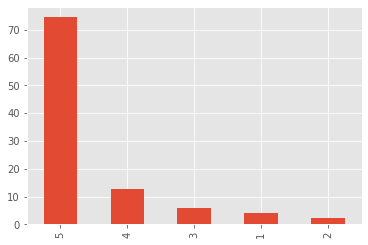

In [ ]:
rating_pct.plot.bar()
plt.show()

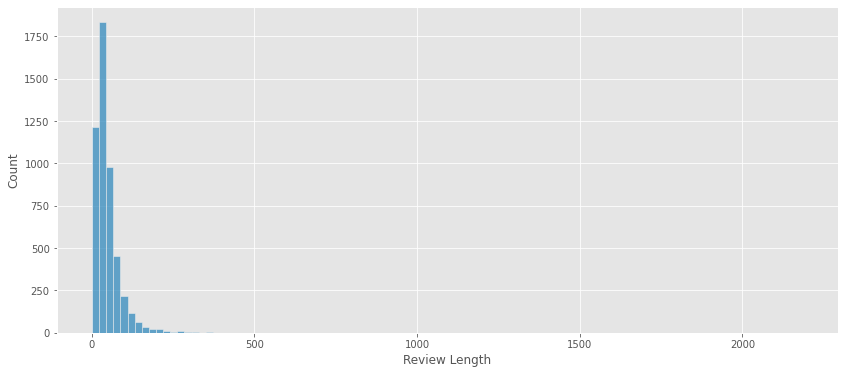

In [ ]:
plt.figure(figsize = (14,6))
WordsPerReview = df['body'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

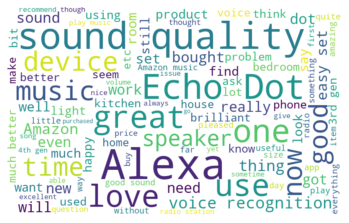

In [ ]:
txt = ' '.join(review for review in df.body)

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
df = pd.DataFrame(df,columns = ['rating','body'])
df.rename(columns = {'rating':'Rating','body':'Review'},inplace = True)

In [ ]:
df.head()

,Rating,Review
0,5,Your browser does not support HTML5 video.\n\n...
1,5,Your browser does not support HTML5 video.\n\n...
2,3,Your browser does not support HTML5 video.\n\n...
3,4,A smashing tool for somebody with ms. My wide...
4,3,Your browser does not support HTML5 video.\n\n...


In [ ]:
def apply_sentiment(Rating):
    if(Rating <=2 ):
        return 0
    else:
        return 1

In [ ]:
df['Sentiment'] = df['Rating'].apply(apply_sentiment)
df.drop(['Rating'],axis = 1, inplace = True)

In [ ]:
df.head()

,Review,Sentiment
0,Your browser does not support HTML5 video.\n\n...,1
1,Your browser does not support HTML5 video.\n\n...,1
2,Your browser does not support HTML5 video.\n\n...,1
3,A smashing tool for somebody with ms. My wide...,1
4,Your browser does not support HTML5 video.\n\n...,1


In [ ]:
sentiment = df['Sentiment'].value_counts()
sentiment

1    4665
0     335
Name: Sentiment, dtype: int64

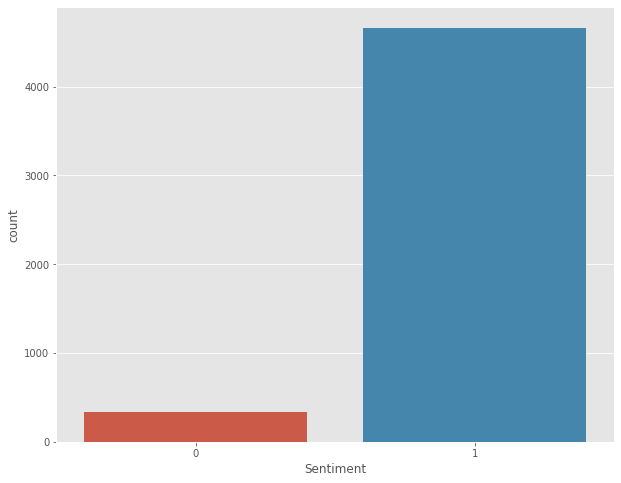

In [ ]:
plt.figure(figsize = ( 10,8))
sns.countplot(data = df, x = 'Sentiment')
plt.show()

In [ ]:
def clean_text(Review):
   
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

In [ ]:
df['Review'] = df['Review'].apply(clean_text)

In [ ]:
df.head()

,Review,Sentiment
0,your browser does not support video hello e...,1
1,your browser does not support video i had a...,1
2,your browser does not support video this pr...,1
3,a smashing tool for somebody with ms my wide ...,1
4,your browser does not support video there a...,1


In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stopword = []
sentence = df['Review'][0]


#words = nltk.word_tokenize(sentence)


def remove_stopword(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

df['reviews_text'] = df['Review'].apply(lambda row: remove_stopword(stop_words, row))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'],random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((4000,), (1000,), (4000,))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [ ]:
X = df['reviews_text']
y = df['Sentiment']

In [ ]:
fit_model = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print('Training accuracy:', fit_model.score(X_train,y_train))
print('Test accuracy:', fit_model.score(X_test,y_test))

Training accuracy: 0.93325
Test accuracy: 0.932


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.93      1.00      0.96       932

    accuracy                           0.93      1000
   macro avg       0.47      0.50      0.48      1000
weighted avg       0.87      0.93      0.90      1000

[[  0  68]
 [  0 932]]
